<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/OUTLIERS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SUBIMOS PROVISIONALMENTE EL ARCHIVO A GOOGLE COLAB. 
# El archivo esta aquí C:\Users\FJMartin\OneDrive - JARMAUTO\Documentos\2018\POWER BI INFORMES\DATOS MAESTROS\MACHINE LEARNING
# y es el que esta debajo CONSULTA1_AGR_F_APERTURA  es el u382 agrupado por fecha de apertura


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

- esto abriendo una consulta dentro de un excel.
- lo he subido a colab y luego lo he abierto. Tarda un poco en subir.
- tengo que poner el nombre de la pestaña. 
- ojo tarda un poco en subir el archivo a colab. un archivo de 34mb ha tardado 1 minuto y 30 segundos. 

In [3]:
xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U382_BASE2.xlsx")
df = pd.read_excel(xlsx, "CONSULTA1_AGR_F_APERTURA" )
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 

In [ ]:
""" xlsx = pd.ExcelFile("/content/U382_BASE2.xlsx")
df = pd.read_excel(xlsx, "CONSULTA1_AGR_F_APERTURA" ) """

In [4]:
df.head()

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0


In [5]:
df.info() # ARCHIVO EN BRUTO CON 145694 PASOS DE TALLER. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145695 entries, 0 to 145694
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Orden_Corta            145695 non-null  int64         
 1   Recuento               145695 non-null  int64         
 2   F_APERTURA             145695 non-null  datetime64[ns]
 3   SUMA_RECAMBIOS         145695 non-null  float64       
 4   SUMA_MO                145694 non-null  float64       
 5   SUMA_HORAS_FACTURADAS  145695 non-null  float64       
 6   AÑOS_VEHICULO          145695 non-null  float64       
 7   KM                     145694 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 8.9 MB


In [6]:
df.describe() # AQUI ESTÁN LOS ESTADISTICOS SIN HABER MODIFICADO NADA. 

,Orden_Corta,Recuento,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
count,1.456950e+05,145695.000000,145695.000000,145694.000000,145695.000000,145695.000000,145694.000000
mean,1.070782e+06,1.453564,334.529579,242.391004,4.443828,5.785898,91140.843240
std,1.727761e+05,0.850063,702.359577,371.963158,7.411066,4.488056,75343.883965
min,3.532300e+05,1.000000,-16621.630000,-16621.630000,-313.620000,0.000000,-20000.000000
25%,9.238030e+05,1.000000,42.120000,60.200000,1.000000,2.167123,32572.750000
50%,1.063734e+06,1.000000,167.760000,139.565000,2.200000,4.410959,70526.000000
75%,1.220650e+06,2.000000,383.900000,279.560000,4.650000,8.369863,127239.000000
max,1.377125e+06,16.000000,27892.830000,33243.260000,763.860000,29.953425,964478.000000


In [7]:
df.isnull().sum()

Orden_Corta              0
Recuento                 0
F_APERTURA               0
SUMA_RECAMBIOS           0
SUMA_MO                  1
SUMA_HORAS_FACTURADAS    0
AÑOS_VEHICULO            0
KM                       1
dtype: int64

#HACEMOS EL CLUSTER

In [8]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

In [9]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
# Suppress Warning

import warnings
warnings.filterwarnings("ignore")

In [11]:
df.head()

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0


In [12]:
df.info() # tengo que cambiar formatos. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145695 entries, 0 to 145694
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Orden_Corta            145695 non-null  int64         
 1   Recuento               145695 non-null  int64         
 2   F_APERTURA             145695 non-null  datetime64[ns]
 3   SUMA_RECAMBIOS         145695 non-null  float64       
 4   SUMA_MO                145694 non-null  float64       
 5   SUMA_HORAS_FACTURADAS  145695 non-null  float64       
 6   AÑOS_VEHICULO          145695 non-null  float64       
 7   KM                     145694 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 8.9 MB


In [13]:
df["Orden_Corta"] = df["Orden_Corta"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145695 entries, 0 to 145694
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Orden_Corta            145695 non-null  object        
 1   Recuento               145695 non-null  int64         
 2   F_APERTURA             145695 non-null  datetime64[ns]
 3   SUMA_RECAMBIOS         145695 non-null  float64       
 4   SUMA_MO                145694 non-null  float64       
 5   SUMA_HORAS_FACTURADAS  145695 non-null  float64       
 6   AÑOS_VEHICULO          145695 non-null  float64       
 7   KM                     145694 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 8.9+ MB


In [14]:
df.shape # tenemos 145695 pasos de taller y 8 variables

(145695, 8)

In [15]:
df.describe()

,Recuento,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
count,145695.000000,145695.000000,145694.000000,145695.000000,145695.000000,145694.000000
mean,1.453564,334.529579,242.391004,4.443828,5.785898,91140.843240
std,0.850063,702.359577,371.963158,7.411066,4.488056,75343.883965
min,1.000000,-16621.630000,-16621.630000,-313.620000,0.000000,-20000.000000
25%,1.000000,42.120000,60.200000,1.000000,2.167123,32572.750000
50%,1.000000,167.760000,139.565000,2.200000,4.410959,70526.000000
75%,2.000000,383.900000,279.560000,4.650000,8.369863,127239.000000
max,16.000000,27892.830000,33243.260000,763.860000,29.953425,964478.000000


- La media de Recambios por paso es 334 y la mediana 167.76
- la media de Mo por paso es de 242.39 y la mediana 139.56
- la media de horas por paso es de 4.43 y la mediana 2.20
- la media de la edad de los vehículo es de 5.75 y la mediana 4.41
- la media de KM es de 91.140 y la mediana 70.526

In [16]:
df.isnull().sum()

Orden_Corta              0
Recuento                 0
F_APERTURA               0
SUMA_RECAMBIOS           0
SUMA_MO                  1
SUMA_HORAS_FACTURADAS    0
AÑOS_VEHICULO            0
KM                       1
dtype: int64

In [17]:
df = df.dropna(subset=["KM"]) # CON ESTO LO QUE HAGO ES QUITAR LA FILA QUE TIENE EN KM VALOR NULO. 

In [18]:
df.shape

(145694, 8)

In [19]:
df.isnull().sum()

Orden_Corta              0
Recuento                 0
F_APERTURA               0
SUMA_RECAMBIOS           0
SUMA_MO                  0
SUMA_HORAS_FACTURADAS    0
AÑOS_VEHICULO            0
KM                       0
dtype: int64

## CHEQUEANDO OUTLIERS

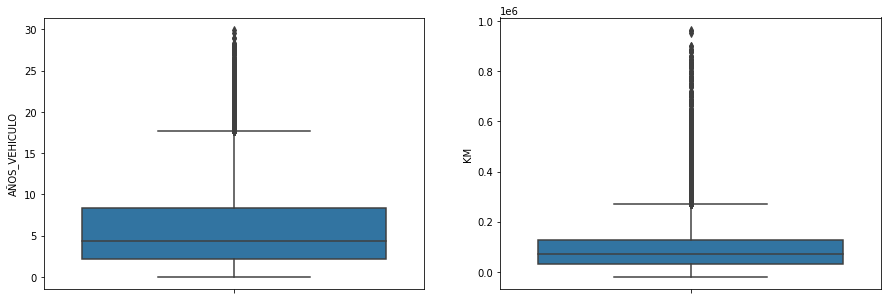

In [20]:
plt.figure(figsize=(15,5)) # aqui poenmos el tamaño de cada cuadradro. 

plt.subplot(1,2,1)
sns.boxplot(data=df, y="AÑOS_VEHICULO") # este va a ocupar el primer lugar de la segunda fila. 

plt.subplot(1,2,2)
sns.boxplot(data=df, y="KM") # este va a ocupar el segundo lugar de la primera fila. 

plt.show()
# lo que estamos viendo es un diagrama de bigotes donde apreciamos que no hay outliers.

# lo voy a hacer con outliers, mas adelante lo veré quitandolos. 

### como tiene outliers los vamos a quitar. 

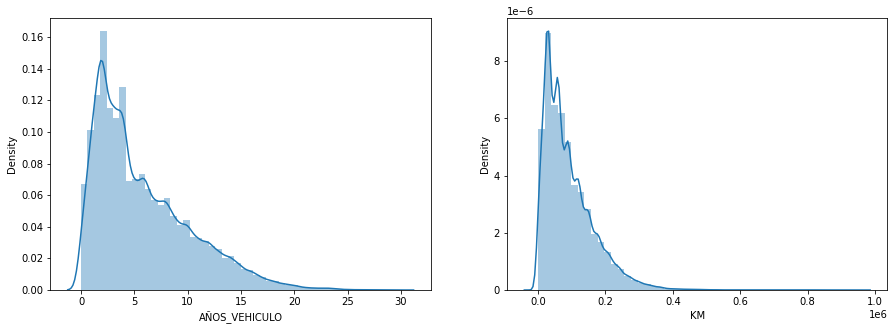

In [21]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['AÑOS_VEHICULO'])

plt.subplot(1,2,2)
sns.distplot(df['KM'])
plt.show()

In [22]:
df["KM"].skew() # esta es la asimetría de KM

1.7500419040564057

In [23]:
df["AÑOS_VEHICULO"].skew() # esta es la asimetría de AÑOS DEL VEHÍCULO

1.0850529707118155

In [24]:
# vamos a calcular estadísticos de KM
print("Mean value of KM",df['KM'].mean())
print("Std value of KM",df['KM'].std())
print("Min value of KM",df['KM'].min())
print("Max value of KM",df['KM'].max())

Mean value of KM 91140.84323994124
Std value of KM 75343.883965466
Min value of KM -20000.0
Max value of KM 964478.0


In [25]:
# Findig the boundary values

print("Highest Allowed", df['KM'].mean() + 3*df['KM'].std())
print('Lowest Allowed ', df['KM'].mean() - 3*df['KM'].std())

# todo lo que este fuera de este intervalo es un outlier. Evidenemente no podemos tener valores negativos. 
# no son outliers todos los coches que tengan entre 317172 y 0 km

Highest Allowed 317172.4951363392
Lowest Allowed  -134890.80865645676


In [26]:
# si queremos ver cuales son los ouliers podemos hacer lo siguiente
# Finding the outline0
df[(df['KM'] > 317172 )| (df['KM'] < 0)]
# aui estamos sacando los outliers. 
# EN TOTAL HAY 1843 PASOS DE TALLER QUE SON OUTLIERS. 

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
171,774329,1,2015-01-07,597.59,131.67,2.10,15.569863,408711.0
305,769796,3,2015-01-12,0.00,917.78,17.97,12.668493,469411.0
403,777326,1,2015-01-13,1051.57,744.47,11.30,3.205479,358211.0
414,777587,1,2015-01-13,1020.20,419.07,5.98,6.043836,373860.0
480,777445,1,2015-01-13,268.68,438.88,7.60,18.624658,347969.0
...,...,...,...,...,...,...,...,...
145468,1374177,1,2022-05-24,9.83,62.56,0.80,16.128767,329225.0
145550,1375622,1,2022-05-25,334.48,297.27,3.40,18.487671,338087.0
145596,1374894,1,2022-05-26,836.56,397.24,7.00,17.441096,385085.0
145606,1376514,1,2022-05-26,23.22,0.00,0.00,9.704110,318616.0


In [27]:
# AHORA LO QUE VAMOS A HACER ES CREAR LA VARIABLE ZSCORE LE LLAMAMOS KM_ZSCORE
df['KM_ZSCORE'] = (df['KM'] - df['KM'].mean())/df['KM'].std()
df.head()
# despues de hacerlo ya podríamos filtrar por zscore, pero vamos a hacer primero lo mismo con años de antiguedad para posteriormente filtrar. 

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0,-0.843557
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0,-0.399645
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0,-0.408565
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0,-0.461044
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0,0.021517


In [28]:
# vamos a calcular estadísticos de AÑOS DEL VEHÍCULO
print("Mean value of AÑOS_VEHICULO",df['AÑOS_VEHICULO'].mean())
print("Std value of AÑOS_VEHICULO",df['AÑOS_VEHICULO'].std())
print("Min value of AÑOS_VEHICULO",df['AÑOS_VEHICULO'].min())
print("Max value of AÑOS_VEHICULO",df['AÑOS_VEHICULO'].max())

Mean value of AÑOS_VEHICULO 5.78593815786925
Std value of AÑOS_VEHICULO 4.488045699610372
Min value of AÑOS_VEHICULO 0.0
Max value of AÑOS_VEHICULO 29.953424657534246


In [29]:
# Findig the boundary values

print("Highest Allowed", df['AÑOS_VEHICULO'].mean() + 3*df['AÑOS_VEHICULO'].std())
print('Lowest Allowed ', df['AÑOS_VEHICULO'].mean() - 3*df['AÑOS_VEHICULO'].std())

# los valores limites son tres veces la desviación standar arriba y debajo. 

Highest Allowed 19.250075256700367
Lowest Allowed  -7.678198940961867


In [30]:
# Finding the outliners

df[(df['AÑOS_VEHICULO'] > 19.25 )| (df['AÑOS_VEHICULO'] < 0)]

# aui estamos sacando los outliers. 
# como vemos debajo tenemos 1313 pasos de taller que serían outliers por edad del vehículo. 

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE
169,775284,1,2015-01-07,201.47,146.30,1.9,19.498630,215657.0,1.652638
290,775753,1,2015-01-09,13.98,150.58,1.5,21.690411,163775.0,0.964035
385,777174,1,2015-01-12,157.10,284.90,3.7,20.153425,168113.0,1.021611
945,778381,1,2015-01-22,71.13,38.50,0.5,20.605479,234641.0,1.904603
1353,780654,2,2015-01-30,566.87,847.30,15.4,20.408219,160971.0,0.926819
...,...,...,...,...,...,...,...,...,...
145313,1369307,1,2022-05-23,300.25,340.66,4.1,19.306849,112072.0,0.277808
145389,1374778,1,2022-05-23,340.99,239.20,2.6,22.504110,275551.0,2.447580
145421,1371668,1,2022-05-24,356.30,334.53,4.0,21.961644,226150.0,1.791906
145478,1374530,1,2022-05-24,0.00,53.67,0.0,22.873973,218796.0,1.694300


In [31]:
# Calculating the Zscore

# Zscore = (val - mean)/std

df['AÑOS_VEHICULO_Z_SCORE'] = (df['AÑOS_VEHICULO'] - df['AÑOS_VEHICULO'].mean())/df['AÑOS_VEHICULO'].std()
df.head()

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0,-0.843557,-1.120094
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0,-0.399645,-0.729406
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0,-0.408565,-0.552376
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0,-0.461044,-0.060964
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0,0.021517,-0.134218


- ahora sí podemos filtrar por ambos zscore para quitar todos los ouliers

In [32]:
# Trimming
new_df = df [(df['KM_ZSCORE'] < 3 ) & (df['KM_ZSCORE'] > -3)]
new_df = new_df [(new_df['AÑOS_VEHICULO_Z_SCORE'] < 3 ) & (new_df['AÑOS_VEHICULO_Z_SCORE'] > -3)]
new_df
# aqui las estamos quitando como he dicho anteriormente 

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0,-0.843557,-1.120094
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0,-0.399645,-0.729406
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0,-0.408565,-0.552376
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0,-0.461044,-0.060964
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0,0.021517,-0.134218
...,...,...,...,...,...,...,...,...,...,...
145690,1375900,1,2022-05-31,0.00,92.00,1.00,7.838356,173876.0,1.098101,0.457308
145691,1375944,1,2022-05-31,248.10,193.46,2.90,6.169863,65577.0,-0.339296,0.085544
145692,1376682,1,2022-05-31,408.05,0.00,0.80,3.849315,68308.0,-0.303048,-0.431507
145693,1376917,1,2022-05-31,0.00,42.93,0.00,16.005479,103588.0,0.165205,2.277058


In [33]:
new_df.describe()

,Recuento,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE
count,142671.000000,142671.000000,142671.000000,142671.000000,142671.000000,142671.000000,142671.000000,142671.000000
mean,1.457339,333.235671,241.931022,4.441455,5.561649,86521.834662,-0.061306,-0.049975
std,0.851479,700.094752,371.082948,7.400750,4.186548,65984.150724,0.875773,0.932822
min,1.000000,-16621.630000,-16621.630000,-313.620000,0.000000,-20000.000000,-1.475114,-1.289189
25%,1.000000,42.120000,60.220000,1.000000,2.126027,31905.000000,-0.786206,-0.815480
50%,1.000000,167.380000,139.030000,2.200000,4.268493,68296.000000,-0.303208,-0.338108
75%,2.000000,381.815000,278.160000,4.630000,8.082192,123092.000000,0.424071,0.511638
max,16.000000,27892.830000,33243.260000,763.860000,19.249315,317045.000000,2.998308,2.999831


In [34]:
new_df[(new_df["AÑOS_VEHICULO"] > 20)] # en este si ha hecho perfectamente el filtro. 

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE


In [35]:
new_df[(new_df["KM"] > 320000)] # Ahora si está correcto

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE


#EDA

## ANALISIS POR VARIABLE

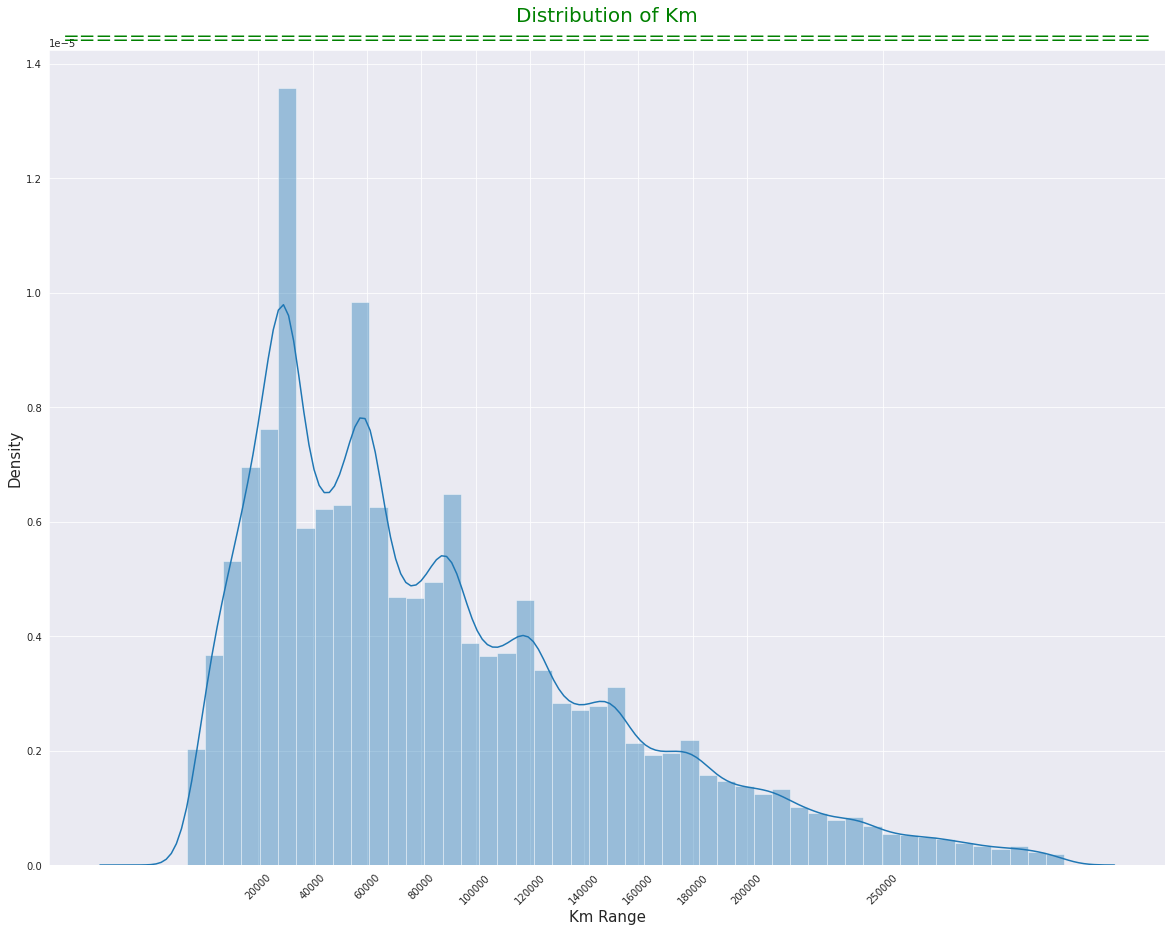

In [36]:
# Checking KM

plt.figure(figsize=(20,15)) # tamaño del gráfico
sns.set_style('darkgrid') # color del mismo

sns.distplot(new_df.KM) # valor que vamos a representar
plt.title("Distribution of Km\n=================================================================", fontsize=20, color="green") # titulo
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xticks(rotation=45) # y así las roto 45 grados. 
plt.xlabel("Km Range", fontsize=15, ) # distancia entre barras
plt.ylabel("Density", fontsize=15) # distancias en el eje x

plt.show()

# veo que se concentra la gran parte entre 60, 80 y 100.000 km luego está bastante disperso. 

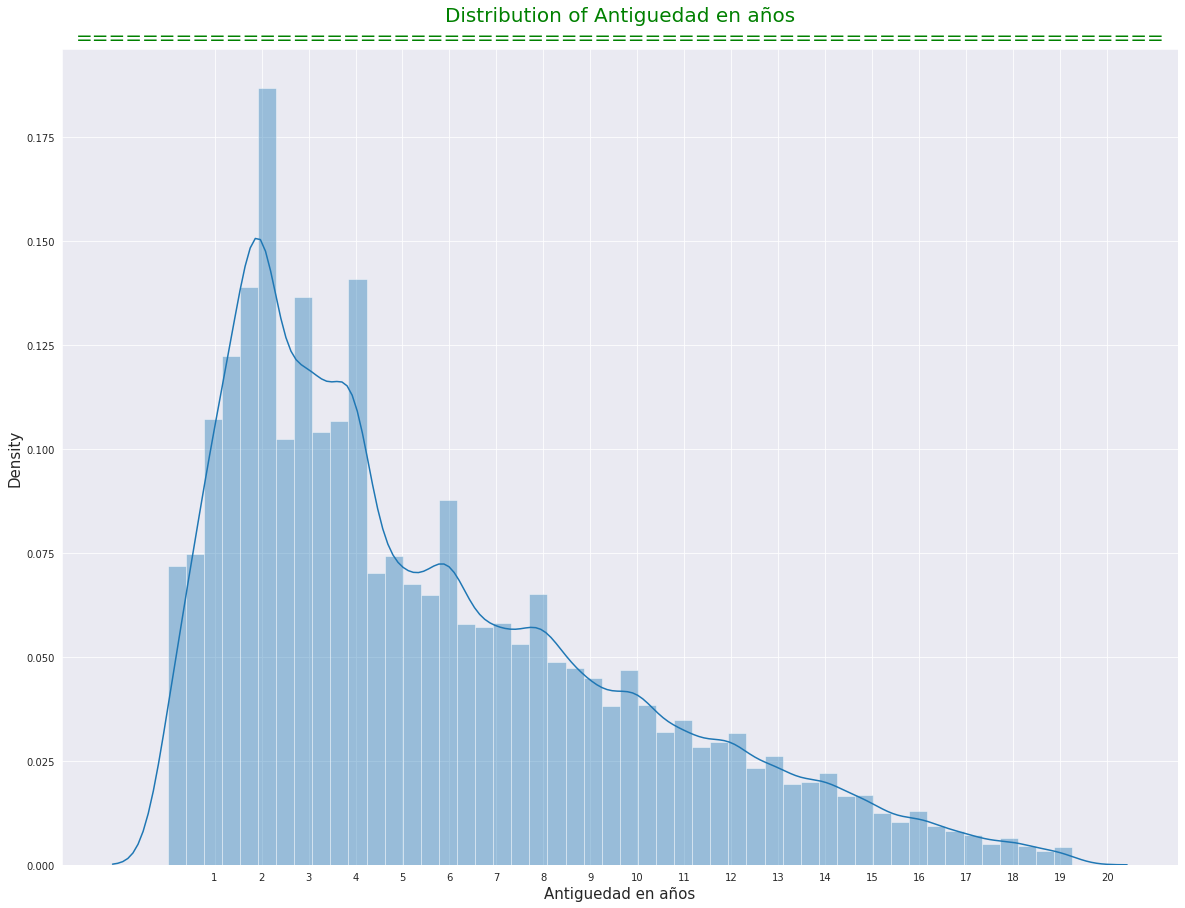

In [37]:
# Checking edad del vehículo

plt.figure(figsize=(20,15)) # tamaño del gráfico
sns.set_style('darkgrid') # color del mismo

sns.distplot(new_df.AÑOS_VEHICULO) # valor que vamos a representar
plt.title("Distribution of Antiguedad en años\n=================================================================", fontsize=20, color="green") # titulo
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xlabel("Antiguedad en años", fontsize=15) # distancia entre barras
plt.ylabel("Density", fontsize=15) # distancias en el eje x

plt.show()

# hay clientes de diferentes edades, no podemos decir que este concentrado en unas cuantas. 

## vamos a hacer un graficos con dos variables. 

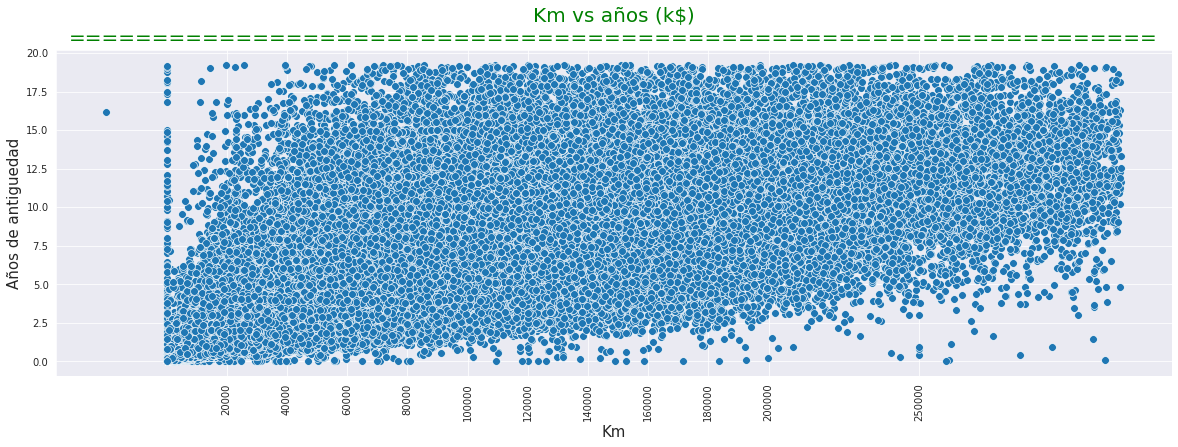

In [38]:
# Años vs Km

plt.figure(figsize=(20,6)) # tamaño del grafico
sns.set_style('darkgrid') # estilo del grafico

sns.scatterplot(data=new_df, x="KM", y= "AÑOS_VEHICULO", s=60) # tipo del gráfico
# le decimos el dataframe a tomar en cuenta y sus variables así como el color y el tamañao
plt.title("Km vs años (k$)\n=================================================================", fontsize=20, color="green")
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.xticks(rotation=90) # y así las roto 45 grados. 
plt.xlabel("Km", fontsize=15)
plt.ylabel("Años de antiguedad", fontsize=15)
plt.show()

## le llamamos binning, que es hacer intervalos con los datos que tenemos

In [39]:
# aqui lo que estamos haciendo es hacer grupos por edad. 
# Age - 

Age_0_2 = new_df.AÑOS_VEHICULO[(new_df.AÑOS_VEHICULO>=0) & (new_df.AÑOS_VEHICULO<=2)] 
Age_3_4 = new_df.AÑOS_VEHICULO[(new_df.AÑOS_VEHICULO>=3) & (new_df.AÑOS_VEHICULO<=4)] 
Age_5_6 = new_df.AÑOS_VEHICULO[(new_df.AÑOS_VEHICULO>=5) & (new_df.AÑOS_VEHICULO<=6)] 
Age_7_8 = new_df.AÑOS_VEHICULO[(new_df.AÑOS_VEHICULO>=7) & (new_df.AÑOS_VEHICULO<=8)] 
Age_9_10 = new_df.AÑOS_VEHICULO[(new_df.AÑOS_VEHICULO>=9) & (new_df.AÑOS_VEHICULO<=10)] 
Age_11_12 = new_df.AÑOS_VEHICULO[(new_df.AÑOS_VEHICULO>=11) & (new_df.AÑOS_VEHICULO<=12)] 
 
Age_12_Above = new_df.AÑOS_VEHICULO[(new_df.AÑOS_VEHICULO>=13)]

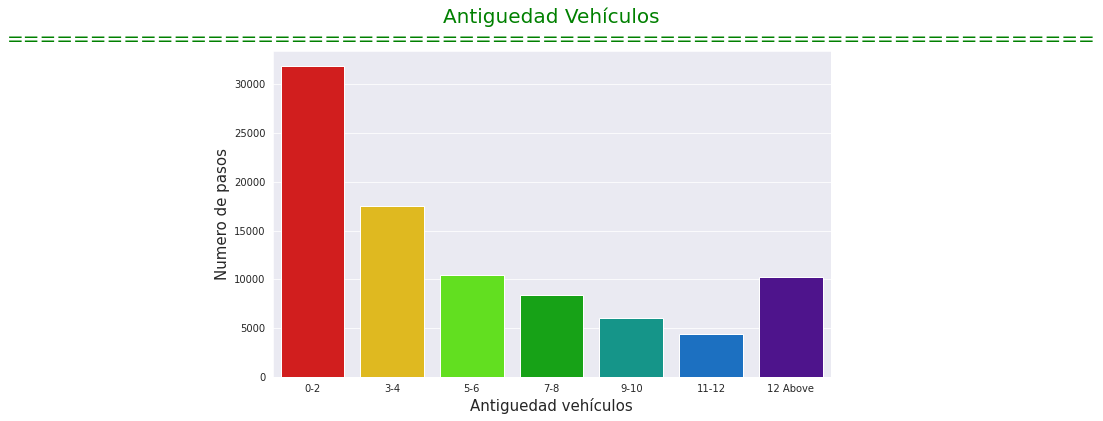

In [40]:
x = ["0-2","3-4","5-6","7-8","9-10","11-12", "12 Above"]
y = [len(Age_0_2.values),len(Age_3_4.values),len(Age_5_6.values),len(Age_7_8.values),len(Age_9_10.values), len(Age_11_12.values), len(Age_12_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Antiguedad Vehículos\n=================================================================", fontsize=20, color="green")
plt.xlabel("Antiguedad vehículos", fontsize=15)
plt.ylabel("Numero de pasos", fontsize=15)
plt.show()

In [41]:
# aqui lo que estamos haciendo es hacer grupos por Km
# Age - 

Km_0_30 = new_df.KM[(new_df.KM>=0) & (new_df.KM<=30000)]         
Km_31_60= new_df.KM[(new_df.KM>=31000) & (new_df.KM<=60000)] 
Km_61_90 = new_df.KM[(new_df.KM>=61000) & (new_df.KM<=90000)] 
Km_91_120 = new_df.KM[(new_df.KM>=91000) & (new_df.KM<=120000)]
Km_121_150 = new_df.KM[(new_df.KM>=121000) & (new_df.KM<=150000)]
Km_151_180 = new_df.KM[(new_df.KM>=151000) & (new_df.KM<=180000)]
Km_181_210 = new_df.KM[(new_df.KM>=181000) & (new_df.KM<=210000)]
Km_211_240 = new_df.KM[(new_df.KM>=211000) & (new_df.KM<=240000)]
  
Km_241_Above = new_df.KM[(new_df.KM>=241000)]

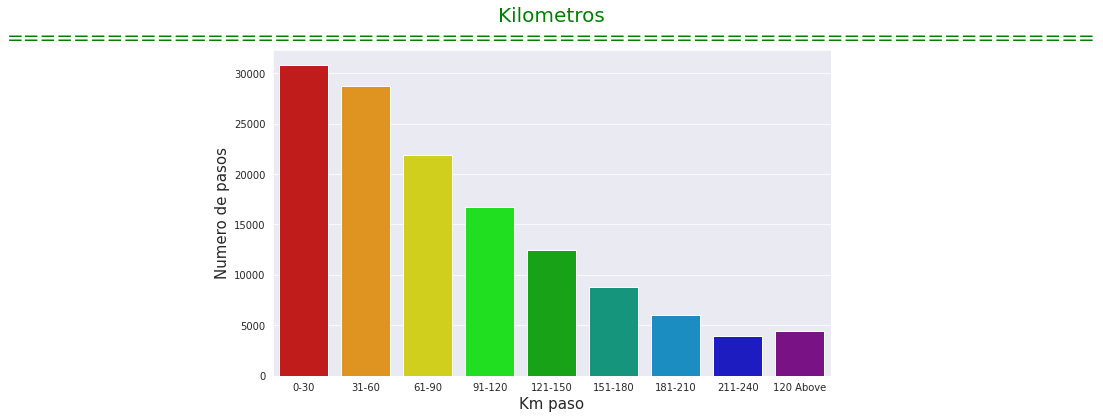

In [42]:
x = ["0-30","31-60","61-90","91-120","121-150","151-180","181-210", "211-240", "120 Above"]
y = [len(Km_0_30.values),len(Km_31_60.values),len(Km_61_90.values),len(Km_91_120.values),len(Km_121_150.values), len(Km_151_180.values),
     len(Km_181_210.values), len(Km_211_240), len(Km_241_Above)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Kilometros\n=================================================================", fontsize=20, color="green")
plt.xlabel("Km paso", fontsize=15)
plt.ylabel("Numero de pasos", fontsize=15)
plt.show()

## Ahora vamos a reescalar. 

In [43]:
df_scaled = new_df[["SUMA_HORAS_FACTURADAS","AÑOS_VEHICULO","KM"]] # aqui estamos creando un nuevo dataframe para estandarizar
# le estamos metiendo las variables edad, ingresos anuales y gasto

# Class instance
scaler = StandardScaler()  # esta es la instancia de escalado

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)  # aqui ajustamos 

In [44]:
df_scaled_fit = pd.DataFrame(df_scaled_fit) # renombramos el dataframe una vez scalado y lo convertimos en un dataframe
df_scaled_fit.columns = ["SUMA_HORAS_FACTURADAS","AÑOS_VEHICULO","KM"] # le ponemos el nombre a las columnas 
df_scaled_fit.head()

,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM
0,-0.562304,-1.147189,-0.893215
1,-0.437992,-0.728364,-0.386334
2,-0.316382,-0.538584,-0.396518
3,-0.032626,-0.011781,-0.456442
4,-0.600138,-0.090310,0.094571


In [45]:
var_list = df_scaled_fit[["AÑOS_VEHICULO","KM"]] # nos quedamos con dos variables. 
var_list

,AÑOS_VEHICULO,KM
0,-1.147189,-0.893215
1,-0.728364,-0.386334
2,-0.538584,-0.396518
3,-0.011781,-0.456442
4,-0.090310,0.094571
...,...,...
142666,0.543817,1.323871
142667,0.145279,-0.317423
142668,-0.409010,-0.276034
142669,2.494625,0.258641


In [46]:
# Calculating sum of squared distance
# calculando el cuadrado de las distancias. 
ssd = [] # creamos lista vacía. 

for num_clusters in range(1,11): # generamos el bucle. 
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50) # le metemos la variables para el kmeans
    kmeans.fit(var_list) # los ajustamos al dataframe var_list que jemso creado arriba. 
    
    ssd.append(kmeans.inertia_) # kmeans-inertia el el valor de la distancia cuadratica. 

In [47]:
ssd # estas son las distancias cuadráticas de los puntos. 

[285341.99999999965,
 106666.24224248964,
 70942.45568763744,
 55021.354289342766,
 43552.065893631996,
 36889.95241726324,
 31605.456433133564,
 28318.602526660885,
 25138.763359662804,
 22771.294743209248]

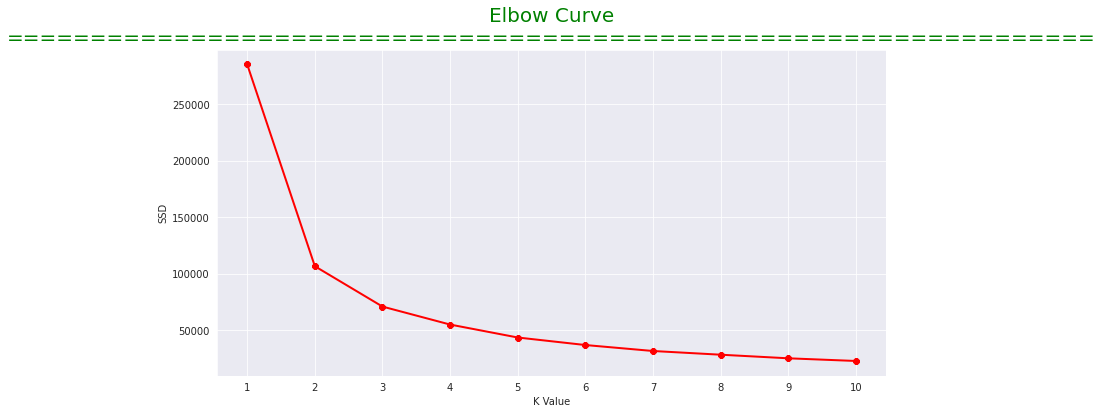

In [48]:
plt.figure(figsize=(12,6)) # tamaño del gráfico 

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
# en el grafico metemos el range, la lista ssd, ancho  de la linea, color y el tamaño del punto
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")  
plt.xticks(np.arange(1,11,1))  # estos son los valores que queremos que aparezcan en el eje x
plt.ylabel("SSD")

plt.show()

# como podemos ver debajo el codo pierde la pendiente en k igual a 4

In [49]:
# K=4

kmeans = KMeans(n_clusters=4, max_iter=50)  # aqui ya ponemos que el numero de clusters es 5
kmeans.fit(var_list) # lo ajustamos al dataframe. 

KMeans(max_iter=50, n_clusters=4)

In [50]:
kmeans.labels_  # aqui ya tenemos a que kluster pertencen

array([1, 1, 1, ..., 1, 3, 1], dtype=int32)

In [51]:
new_df["Label"] = kmeans.labels_
# aui estamos creando una variable donde metemos todos los clusters.
# estamos metiendolo en el dataframe df. 

In [52]:
new_df.head()

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE,Label
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0,-0.843557,-1.120094,1
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0,-0.399645,-0.729406,1
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0,-0.408565,-0.552376,1
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0,-0.461044,-0.060964,0
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0,0.021517,-0.134218,0


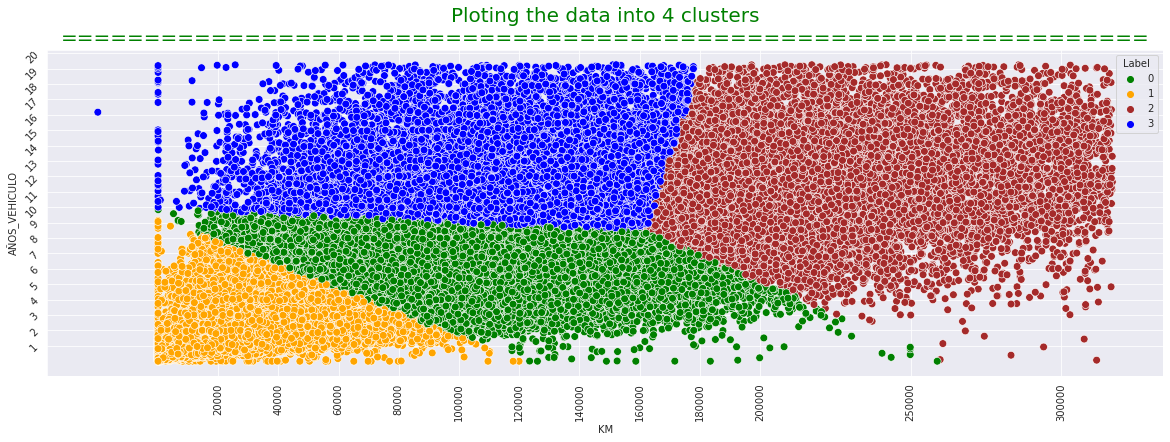

In [53]:
# ScatterPlot when K=4

# ahora vamos a graficar el cluster segun ingresos y gastos. 

plt.figure(figsize=(20,6))

plt.title("Ploting the data into 4 clusters\n=================================================================", fontsize=20, color="green")
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000,300000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.yticks(rotation=45) # y así las roto 45 grados. 
plt.xticks(rotation=90) # y así las roto 45 grados. 
sns.scatterplot(data=new_df, x="KM", y="AÑOS_VEHICULO", hue="Label", s=60, palette=['green','orange','brown','blue'])
# metemos el dataframe df, la x va a ser annual income y la y spending score, el color será el cluster . y le ponemos color a cada cluster. 

plt.show()

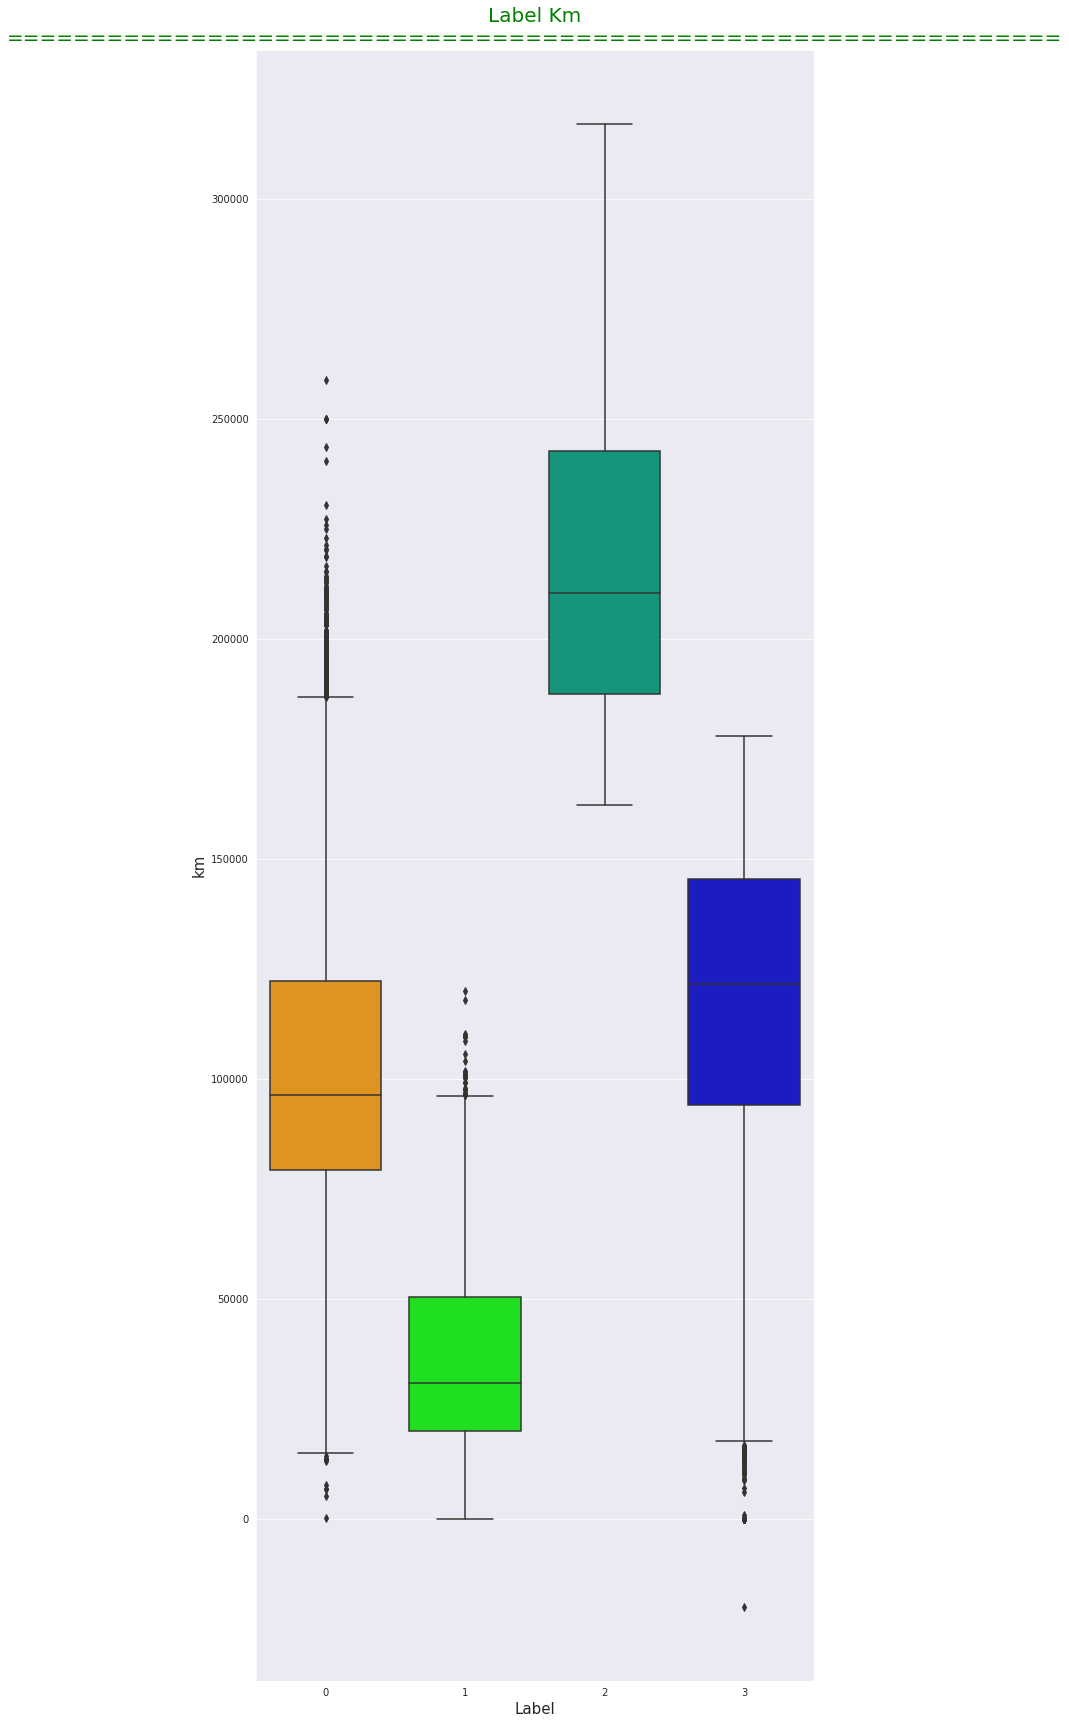

In [54]:
# plot

# ahora lo que vemos de cada cluster son sus estadisticos. 

plt.figure(figsize=(10,30)) # tamaño del gráfico
sns.boxplot(x='Label', y='KM', data=new_df, palette="nipy_spectral_r") # las variables que voy a meter en el gráfico, además del dataframe que voy a utilizar. 
plt.title("Label Km\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="km",fontsize=15)
plt.show()

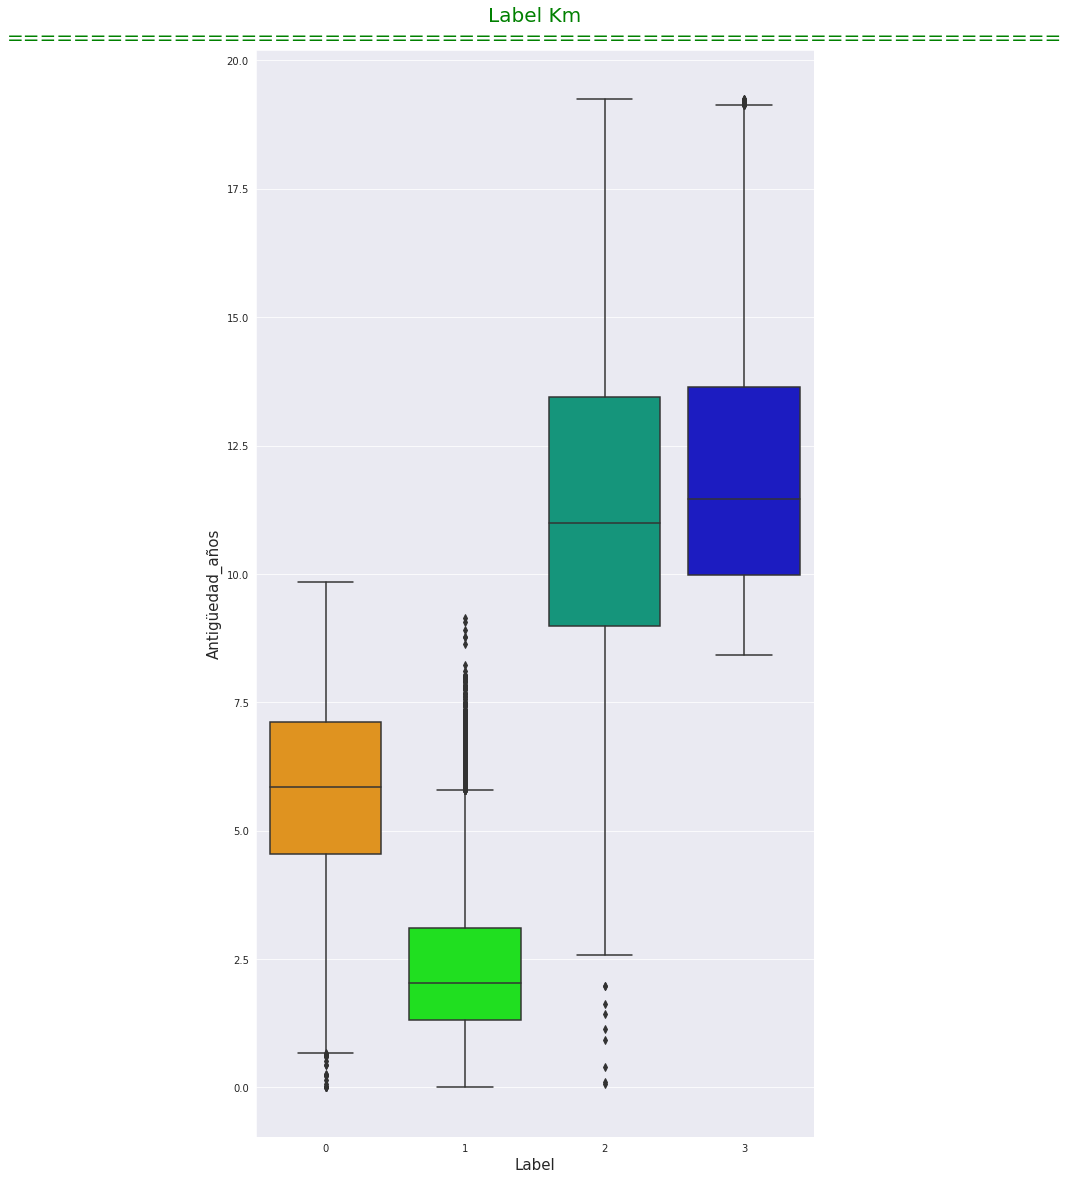

In [55]:
# plot

# ahora lo que vemos de cada cluster son sus estadisticos. 

plt.figure(figsize=(10,20)) # tamaño del gráfico
sns.boxplot(x='Label', y='AÑOS_VEHICULO', data=new_df, palette="nipy_spectral_r") # las variables que voy a meter en el gráfico, además del dataframe que voy a utilizar. 
plt.title("Label Km\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Antigüedad_años",fontsize=15)
plt.show()

In [56]:
# Getting the CustomerId for each group

# vamos a crear una variable para cada cluster y los vamos a contar, además de decir cual es su id. 

cust1 = new_df[new_df.Label==0]
print("The number of customers in 1st group = ", len(cust1))

print("============================================================================================\n")

cust2 = new_df[new_df.Label==1]
print("The number of customers in 2nd group = ", len(cust2))

print("============================================================================================\n")

cust3 = new_df[new_df.Label==2]
print("The number of customers in 3rd group = ", len(cust3))

print("============================================================================================\n")

cust4 = new_df[new_df.Label==3]
print("The number of customers in 4th group = ", len(cust4))

print("============================================================================================\n")



The number of customers in 1st group =  42029

The number of customers in 2nd group =  66345

The number of customers in 3rd group =  17229

The number of customers in 4th group =  17068



In [57]:
# el total de puntos es 
total = 66279 + 17273 + 42218 + 16901 
print(total)

142671


In [58]:
Cust1_peso = len(cust1)/total
Cust1_peso

0.29458684666119955

In [59]:
Cust3_peso = len(cust3)/total
Cust3_peso

0.12076035073701033

In [60]:
print ("solmanete el cluster 0 y el 2 tienen un peso total = ", Cust1_peso + Cust3_peso)

solmanete el cluster 0 y el 2 tienen un peso total =  0.4153471973982099


In [61]:
cust1

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE,Label
3,774715,2,2015-01-02,236.36,317.02,4.20,5.512329,56404.0,-0.461044,-0.060964,0
4,775595,1,2015-01-02,0.00,0.00,0.00,5.183562,92762.0,0.021517,-0.134218,0
8,775683,6,2015-01-02,893.28,2055.34,41.05,3.709589,131745.0,0.538918,-0.462640,0
12,775639,1,2015-01-02,219.05,240.90,3.30,6.734247,145360.0,0.719623,0.211297,0
15,775717,1,2015-01-02,367.61,372.30,5.10,5.430137,101362.0,0.135660,-0.079278,0
...,...,...,...,...,...,...,...,...,...,...,...
145683,1374841,1,2022-05-31,379.28,227.04,2.90,5.583562,83062.0,-0.107226,-0.045092,0
145685,1375014,1,2022-05-31,0.00,0.00,0.00,5.093151,58675.0,-0.430902,-0.154363,0
145686,1375061,1,2022-05-31,121.89,110.40,2.40,8.054795,124762.0,0.446236,0.505533,0
145688,1375696,1,2022-05-31,183.04,206.40,2.75,5.309589,60530.0,-0.406282,-0.106137,0


In [62]:
cust2

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE,Label
0,775439,1,2015-01-02,0.00,19.83,0.28,0.758904,27584.0,-0.843557,-1.120094,1
1,774412,1,2015-01-02,119.78,62.04,1.20,2.512329,61030.0,-0.399645,-0.729406,1
2,774401,1,2015-01-02,136.80,161.70,2.10,3.306849,60358.0,-0.408565,-0.552376,1
5,775706,1,2015-01-02,82.64,0.00,0.00,0.010959,3.0,-1.209625,-1.286747,1
6,775243,2,2015-01-02,250.55,227.90,2.96,3.493151,61011.0,-0.399898,-0.510865,1
...,...,...,...,...,...,...,...,...,...,...,...
145680,1374256,1,2022-05-31,240.54,154.80,1.80,3.967123,60001.0,-0.413303,-0.405258,1
145682,1374713,1,2022-05-31,267.87,129.26,1.90,3.923288,40364.0,-0.673935,-0.415025,1
145687,1375312,1,2022-05-31,199.27,141.90,2.35,3.923288,53116.0,-0.504684,-0.415025,1
145692,1376682,1,2022-05-31,408.05,0.00,0.80,3.849315,68308.0,-0.303048,-0.431507,1


In [63]:
cust3

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE,Label
10,772314,1,2015-01-02,0.00,0.00,0.00,11.602740,224792.0,1.773882,1.296066,2
19,774621,7,2015-01-02,2054.64,2866.56,52.58,8.802740,183741.0,1.229033,0.672186,2
26,775661,1,2015-01-02,251.48,48.51,0.70,9.235616,191197.0,1.327993,0.768637,2
43,775674,1,2015-01-05,196.61,116.07,1.59,5.956164,191198.0,1.328006,0.037929,2
61,775747,1,2015-01-05,460.02,388.60,6.90,11.695890,183748.0,1.229126,1.316821,2
...,...,...,...,...,...,...,...,...,...,...,...
145653,1375096,1,2022-05-30,772.81,474.04,6.50,9.098630,180566.0,1.186893,0.738115,2
145660,1376379,1,2022-05-30,44.03,0.00,0.00,14.224658,241792.0,1.999514,1.880266,2
145684,1374867,1,2022-05-31,129.87,70.38,0.90,12.591781,262781.0,2.278090,1.516438,2
145689,1375758,1,2022-05-31,0.00,0.00,0.00,13.282192,221138.0,1.725384,1.670271,2


In [64]:
cust4

,Orden_Corta,Recuento,F_APERTURA,SUMA_RECAMBIOS,SUMA_MO,SUMA_HORAS_FACTURADAS,AÑOS_VEHICULO,KM,KM_ZSCORE,AÑOS_VEHICULO_Z_SCORE,Label
9,774744,1,2015-01-02,231.09,189.46,2.40,9.208219,99996.0,0.117530,0.762533,3
13,774812,1,2015-01-02,286.88,69.30,1.00,13.109589,110943.0,0.262824,1.631813,3
25,774113,1,2015-01-02,11.53,73.00,1.00,9.216438,119103.0,0.371127,0.764364,3
29,774410,1,2015-01-02,409.65,206.15,3.15,11.167123,111486.0,0.270031,1.199004,3
34,775616,1,2015-01-02,0.00,0.83,0.00,13.509589,116508.0,0.336685,1.720939,3
...,...,...,...,...,...,...,...,...,...,...,...
145657,1376318,1,2022-05-30,0.00,41.28,0.00,14.153425,171399.0,1.065225,1.864394,3
145664,1376526,1,2022-05-30,23.22,0.00,0.00,9.238356,122812.0,0.420355,0.769248,3
145667,1376614,1,2022-05-30,23.22,0.00,0.00,9.608219,75760.0,-0.204142,0.851658,3
145681,1374407,1,2022-05-31,309.60,257.86,3.40,10.068493,87220.0,-0.052039,0.954214,3


In [65]:
Sum_Cust1 = cust1.SUMA_RECAMBIOS.sum()
Ratio_Paso_Cust1 = Sum_Cust1 / len(cust1)

In [71]:
Sum_Cust2 = cust2.SUMA_RECAMBIOS.sum()
Ratio_Paso_Cust2 = Sum_Cust2 / len(cust2)

In [73]:
Sum_Cust3 = cust3.SUMA_RECAMBIOS.sum()
Ratio_Paso_Cust3 = Sum_Cust3 / len(cust3)

In [74]:
Sum_Cust4 = cust4.SUMA_RECAMBIOS.sum()
Ratio_Paso_Cust4 = Sum_Cust4 / len(cust4)

In [ ]:
Sum_Cust1 = cust1
Sum_Cust2 = Cust2
Sum_Cust2 = Cust2
Sum_Cust2 = Cust2




In [66]:
Ratio_Paso_Cust1

356.3456934497609

In [67]:
cust2.SUMA_RECAMBIOS.sum()

18457955.73

In [68]:
cust3.SUMA_RECAMBIOS.sum()

7911178.32

In [69]:
cust4.SUMA_RECAMBIOS.sum()

6197079.180000001

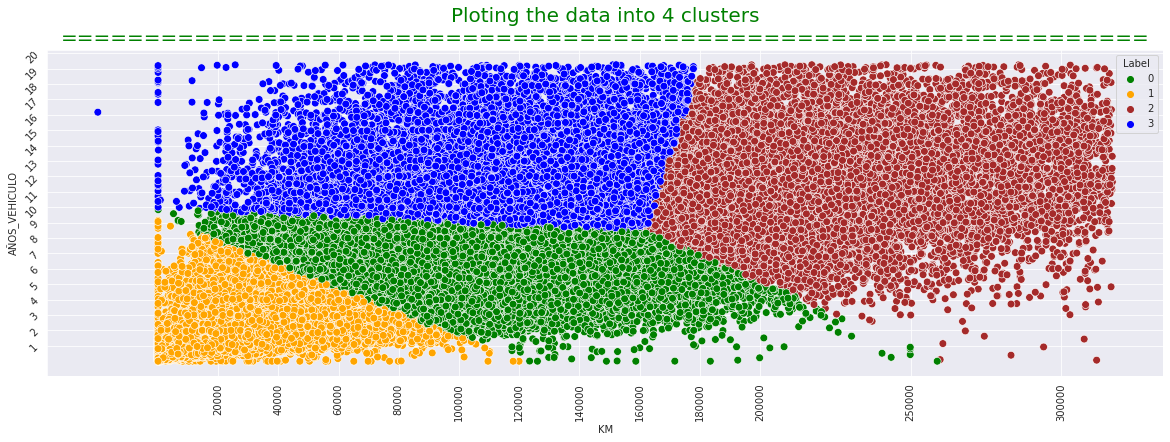

In [76]:
# ScatterPlot when K=4

# ahora vamos a graficar el cluster segun ingresos y gastos. 

plt.figure(figsize=(20,6))

plt.title("Ploting the data into 4 clusters\n=================================================================", fontsize=20, color="green")
plt.xticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,250000,300000]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) # OJO IMPORTANTE CON ESTO CAMBIO LAS ESCALAS DE X
plt.yticks(rotation=45) # y así las roto 45 grados. 
plt.xticks(rotation=90) # y así las roto 45 grados. 
sns.scatterplot(data=new_df, x="KM", y="AÑOS_VEHICULO", hue="Label", s=60, palette=['green','orange','brown','blue'])
# metemos el dataframe df, la x va a ser annual income y la y spending score, el color será el cluster . y le ponemos color a cada cluster. 

plt.show()

In [77]:
print("El numero de pasos de cust1 es {} y la facturación total {} y el ratio paso es {} ".format(len(cust1), Sum_Cust1, Ratio_Paso_Cust1))
print("El numero de pasos de cust2 es {} y la facturación total {} y el ratio paso es {} ".format(len(cust2), Sum_Cust2, Ratio_Paso_Cust2))
print("El numero de pasos de cust3 es {} y la facturación total {} y el ratio paso es {} ".format(len(cust3), Sum_Cust3, Ratio_Paso_Cust3))
print("El numero de pasos de cust4 es {} y la facturación total {} y el ratio paso es {} ".format(len(cust4), Sum_Cust4, Ratio_Paso_Cust4))

El numero de pasos de cust1 es 42029 y la facturación total 14976853.15 y el ratio paso es 356.3456934497609 
El numero de pasos de cust2 es 66345 y la facturación total 18457955.73 y el ratio paso es 278.21170743839025 
El numero de pasos de cust3 es 17229 y la facturación total 7911178.32 y el ratio paso es 459.17803238725406 
El numero de pasos de cust4 es 17068 y la facturación total 6197079.180000001 y el ratio paso es 363.08174244199677 
